Generation 1: Best Route = [3, 0, 2, 4, 1], Distance = 224.00
Generation 2: Best Route = [3, 0, 2, 4, 1], Distance = 224.00
Generation 3: Best Route = [2, 4, 1, 3, 0], Distance = 224.00
Generation 4: Best Route = [2, 4, 1, 3, 0], Distance = 224.00
Generation 5: Best Route = [2, 4, 1, 3, 0], Distance = 224.00
Generation 6: Best Route = [2, 1, 3, 4, 0], Distance = 160.00
Generation 7: Best Route = [2, 1, 3, 4, 0], Distance = 160.00
Generation 8: Best Route = [2, 1, 3, 4, 0], Distance = 160.00
Generation 9: Best Route = [1, 3, 4, 0, 2], Distance = 160.00
Generation 10: Best Route = [1, 3, 4, 0, 2], Distance = 160.00
Generation 11: Best Route = [1, 3, 4, 0, 2], Distance = 160.00
Generation 12: Best Route = [1, 3, 4, 0, 2], Distance = 160.00
Generation 13: Best Route = [1, 3, 4, 0, 2], Distance = 160.00
Generation 14: Best Route = [2, 1, 3, 4, 0], Distance = 160.00
Generation 15: Best Route = [2, 1, 3, 4, 0], Distance = 160.00
Generation 16: Best Route = [1, 3, 4, 0, 2], Distance = 160.00
G

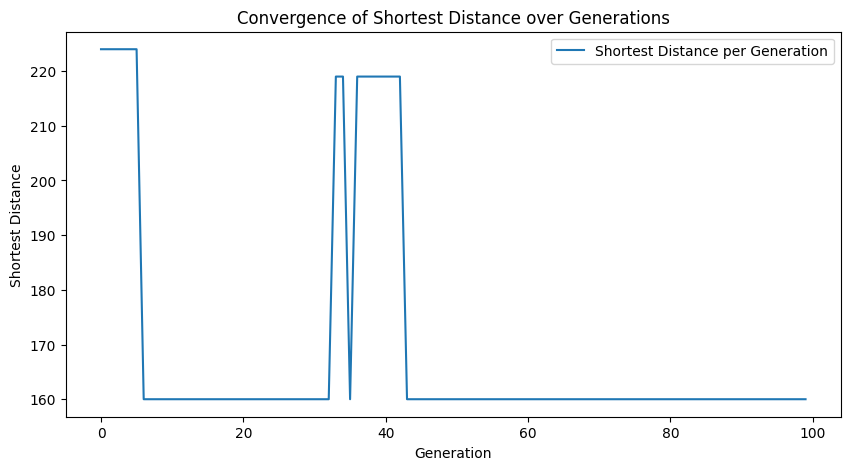

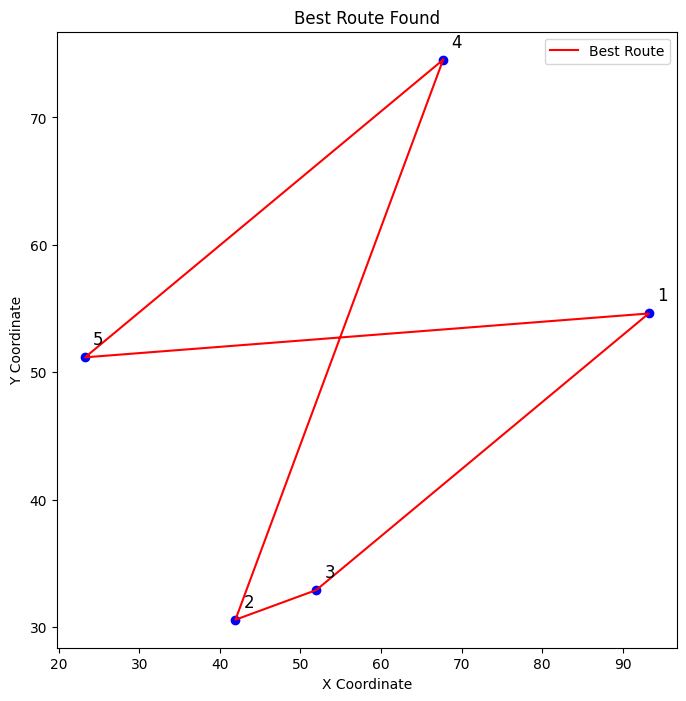

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Initialize parameters
num_cities = 5  # Adjust for a larger number of cities
cities = np.random.rand(num_cities, 2) * 100  # 5 cities with (x, y) coordinates
city_indices = list(range(num_cities))
distance_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))
np.fill_diagonal(distance_matrix, 0)  # Distance to self is 0
population_size = 20
generations = 100
crossover_prob = 0.6
mutation_prob = 0.1

# Step 2: Generate the Initial Population
def generate_initial_population():
    return [random.sample(city_indices, num_cities) for _ in range(population_size)]

# Step 3: Define the Fitness Function
def fitness(route):
    total_distance = sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    total_distance += distance_matrix[route[-1], route[0]]  # Return to start point
    return 1 / total_distance  # Inverse of distance (higher is better)

# Step 4: Selection Process
def selection(population, fitness_values):
    fitness_sum = sum(fitness_values)
    selection_probs = [f / fitness_sum for f in fitness_values]
    selected_indices = np.random.choice(len(population), size=population_size, p=selection_probs)
    selected = [population[i] for i in selected_indices]
    return selected


# Step 5: Crossover (Recombination)
def crossover(parent1, parent2):
    if random.random() > crossover_prob:
        return parent1
    cut = random.randint(1, num_cities - 2)
    child_p1 = parent1[:cut]
    child_p2 = [gene for gene in parent2 if gene not in child_p1]
    return child_p1 + child_p2

# Step 6: Mutation
def mutate(route):
    if random.random() < mutation_prob:
        i, j = random.sample(range(num_cities), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Tracking shortest distance for each generation
shortest_distances = []

# Run Genetic Algorithm
population = generate_initial_population()

for gen in range(generations):
    # Calculate fitness for each individual
    fitness_values = [fitness(route) for route in population]



    # Track the shortest distance
    best_distance = 1 / max(fitness_values)
    shortest_distances.append(best_distance)

    # Selection
    selected_population = selection(population, fitness_values)


    # Crossover and Mutation to generate new population
    next_generation = []
    for i in range(0, population_size, 2):
        parent1, parent2 = selected_population[i], selected_population[i+1]
        child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
        next_generation.extend([mutate(child1), mutate(child2)])

    population = next_generation

    # Print best route in each generation
    best_route = max(population, key=fitness)
    print(f"Generation {gen+1}: Best Route = {best_route}, Distance = {1 / fitness(best_route):.2f}")

# Final result
best_route = max(population, key=fitness)
print(f"\nBest route found: {best_route}")
print(f"Shortest distance: {1 / fitness(best_route):.2f}")


# Plotting the shortest distance over generations
plt.figure(figsize=(10, 5))
plt.plot(shortest_distances, label="Shortest Distance per Generation")
plt.xlabel("Generation")
plt.ylabel("Shortest Distance")
plt.title("Convergence of Shortest Distance over Generations")
plt.legend()
plt.show()

# Plot the best route after the last generation
best_route_index = np.argmax(fitness_values)
best_route = population[best_route_index]

# Plot the cities and best route
plt.figure(figsize=(8, 8))
for i, city in enumerate(cities):
    plt.plot(city[0], city[1], 'bo')
    plt.text(city[0] + 1, city[1] + 1, f"{i+1}", fontsize=12)

route_cities = [cities[i] for i in best_route] + [cities[best_route[0]]]  # Return to start
route_cities = np.array(route_cities)
plt.plot(route_cities[:, 0], route_cities[:, 1], 'r-', label="Best Route")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Best Route Found")
plt.legend()
plt.show()
